In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pykepler.query import *
from pykepler.detrend import detrend_by_quarter
plt.rcParams['figure.figsize'] = (10,4)

In [2]:
kic = 11773022 # Kepler-51
#kic = 9471974 # Kepler=108

In [3]:
cadence = "long"

SearchResult containing 34 data products.

 #       mission      year author exptime  target_name  distance
                                     s                   arcsec 
--- ----------------- ---- ------ ------- ------------- --------
  0 Kepler Quarter 01 2009 Kepler    1800 kplr011773022      0.0
  1 Kepler Quarter 02 2009 Kepler    1800 kplr011773022      0.0
  2 Kepler Quarter 03 2009 Kepler    1800 kplr011773022      0.0
  3 Kepler Quarter 04 2010 Kepler    1800 kplr011773022      0.0
  4 Kepler Quarter 05 2010 Kepler    1800 kplr011773022      0.0
  5 Kepler Quarter 06 2010 Kepler    1800 kplr011773022      0.0
  6 Kepler Quarter 07 2010 Kepler    1800 kplr011773022      0.0
  7 Kepler Quarter 08 2011 Kepler    1800 kplr011773022      0.0
  8 Kepler Quarter 09 2011 Kepler    1800 kplr011773022      0.0
...               ...  ...    ...     ...           ...      ...
 24 Kepler Quarter 15 2012 Kepler      60 kplr011773022      0.0
 25 Kepler Quarter 15 2013 Kepler      60 kplr0

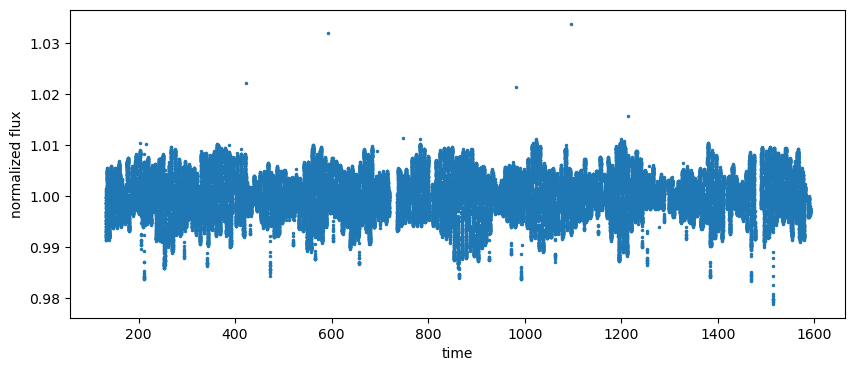

In [4]:
data, lcfile = download_kic(kic, cadence)

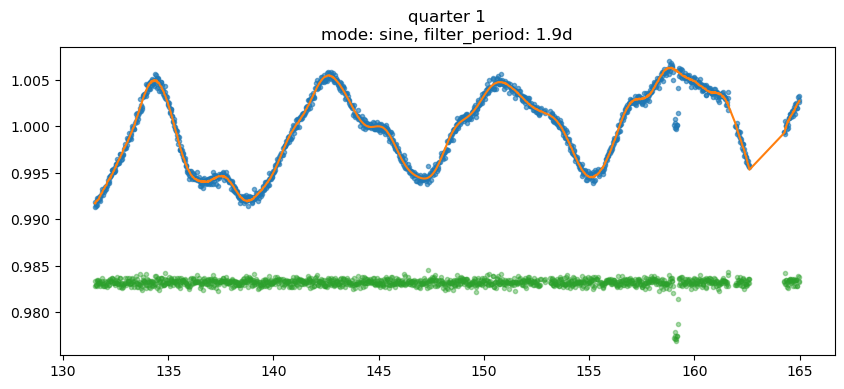

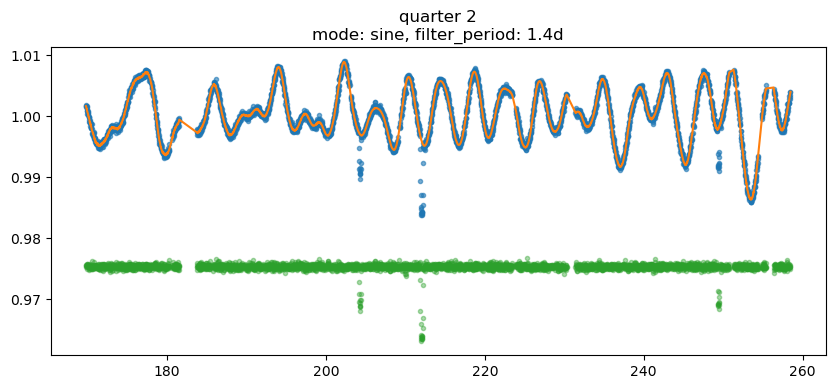

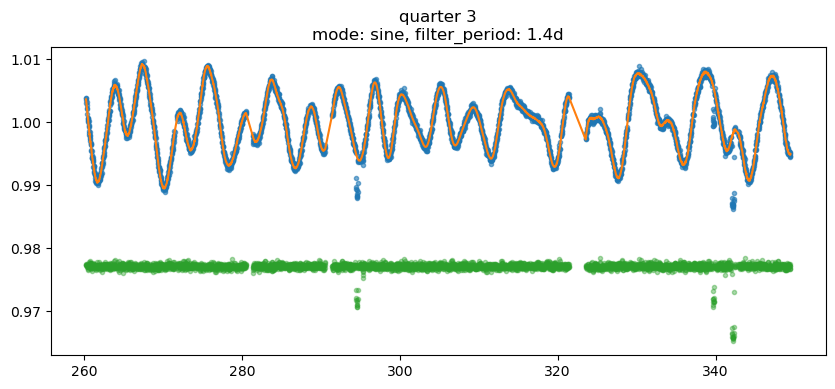

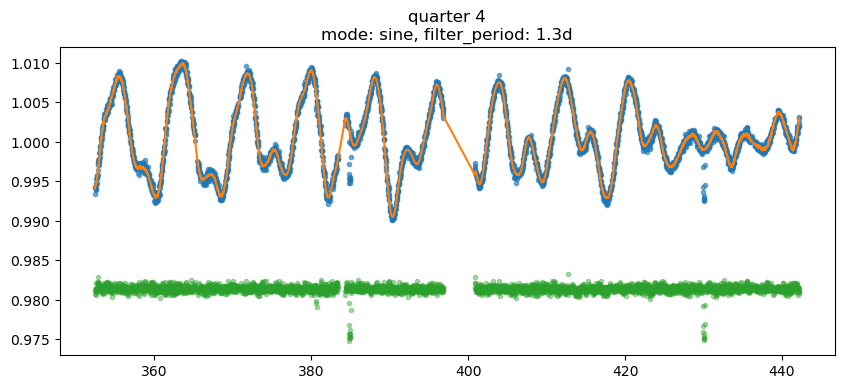

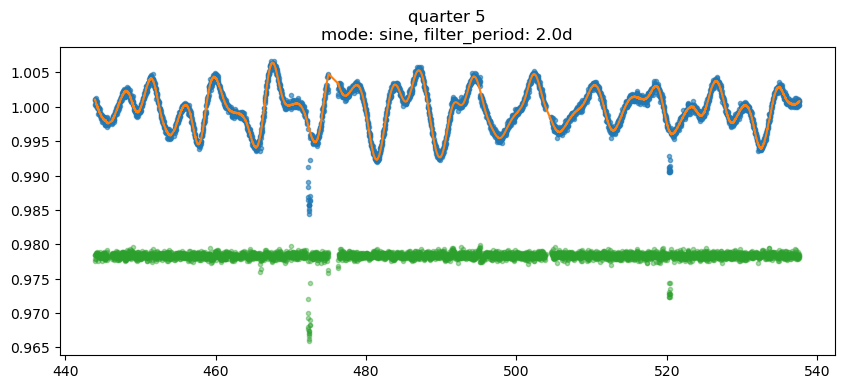

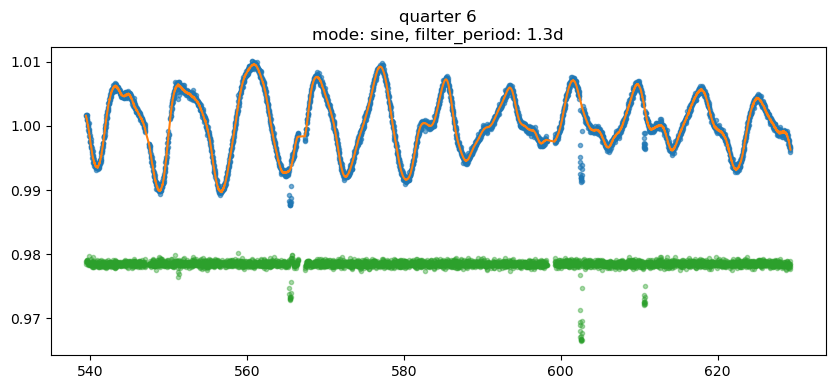

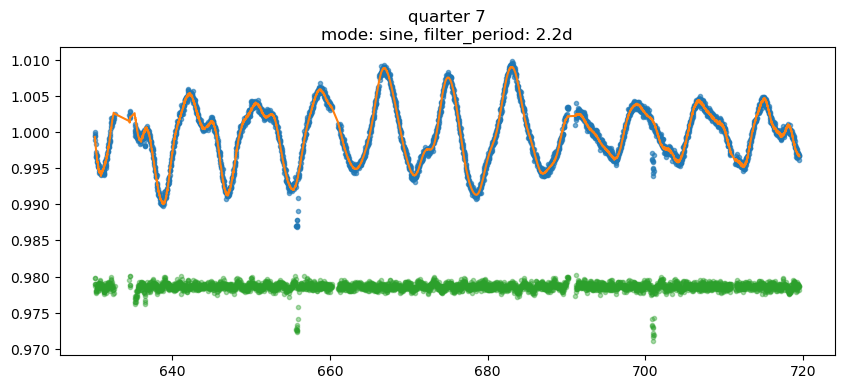

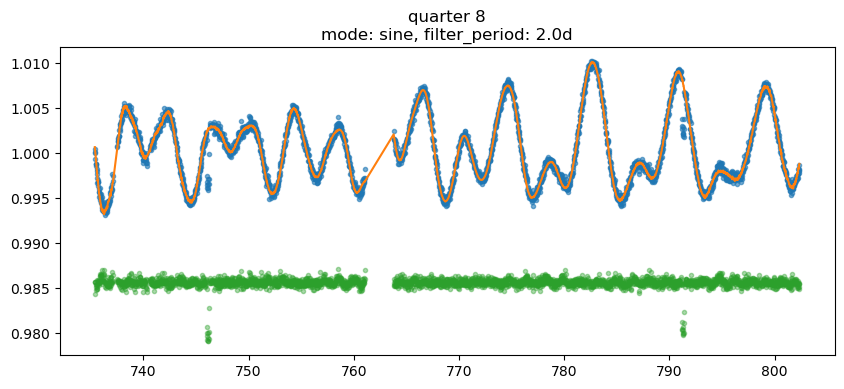

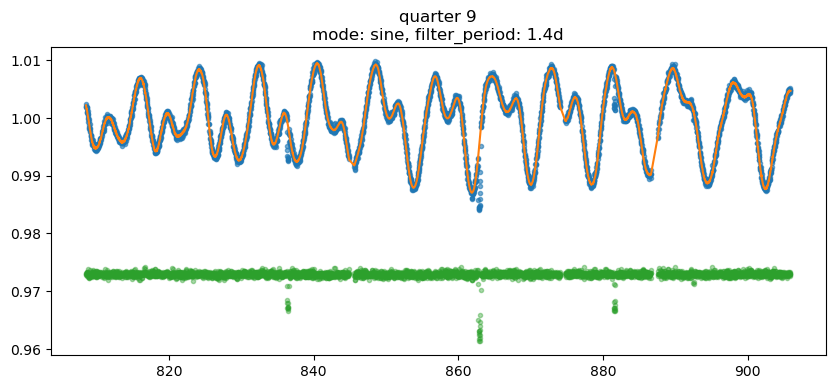

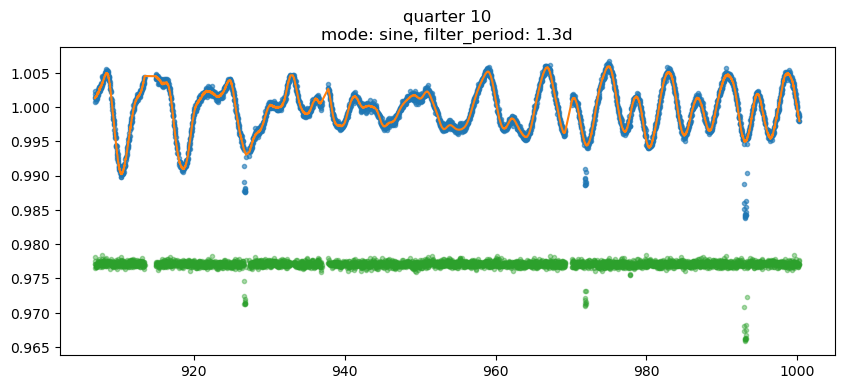

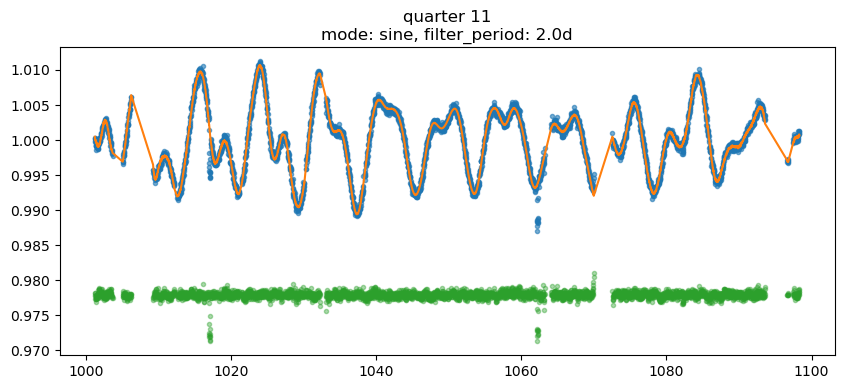

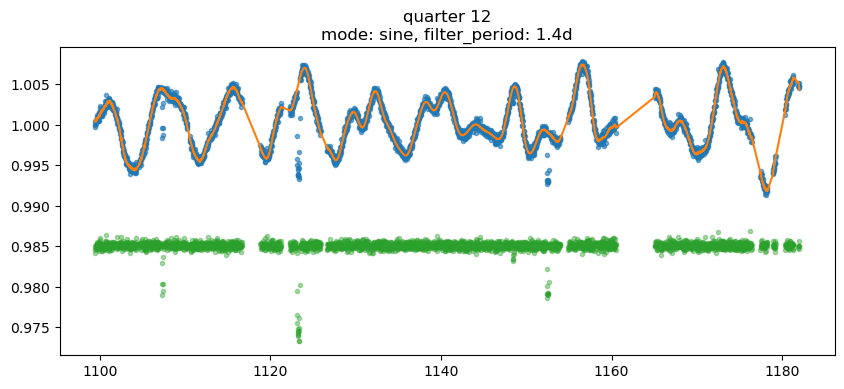

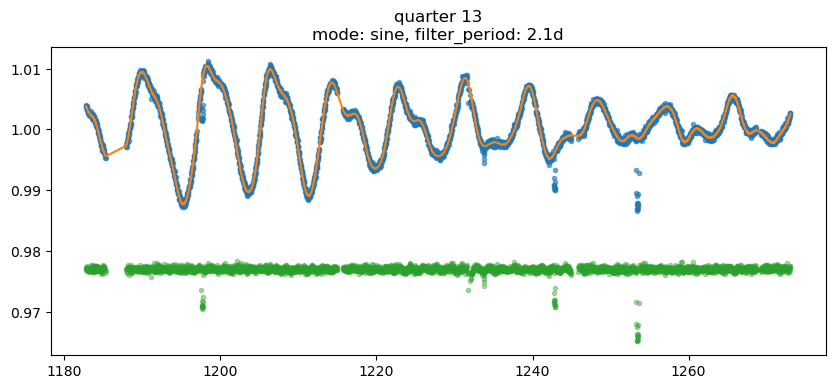

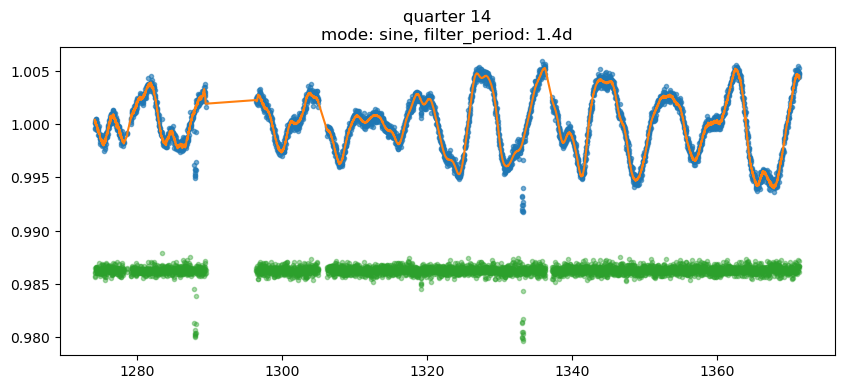

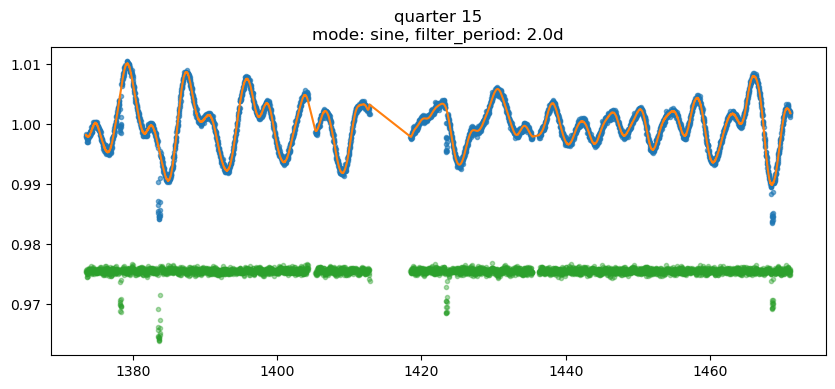

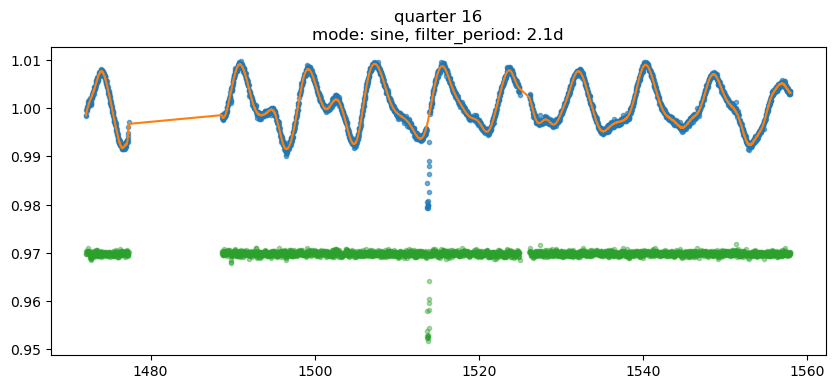

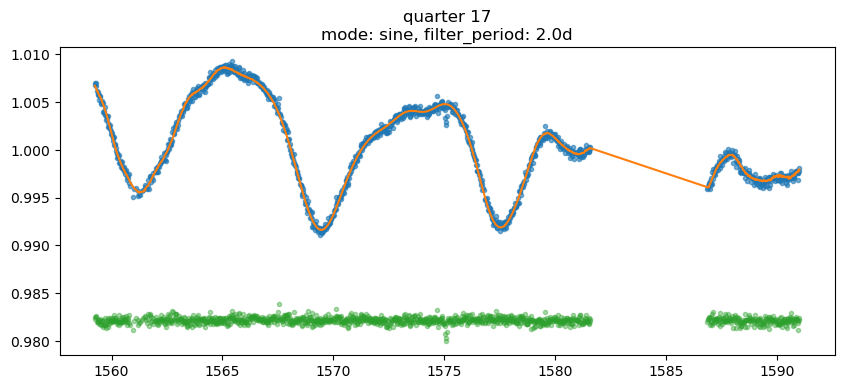

In [5]:
t, f, e, q, fbase = detrend_by_quarter(data)

In [6]:
data_detrend = pd.DataFrame(data={"time": t, "flux": f, "error": e, "quarter": q, "flux_base": fbase})

In [7]:
# save detrended lightcurve
data_detrend.to_csv(lcfile.split(".")[:-1][0] + "_detrend.csv", index=False)

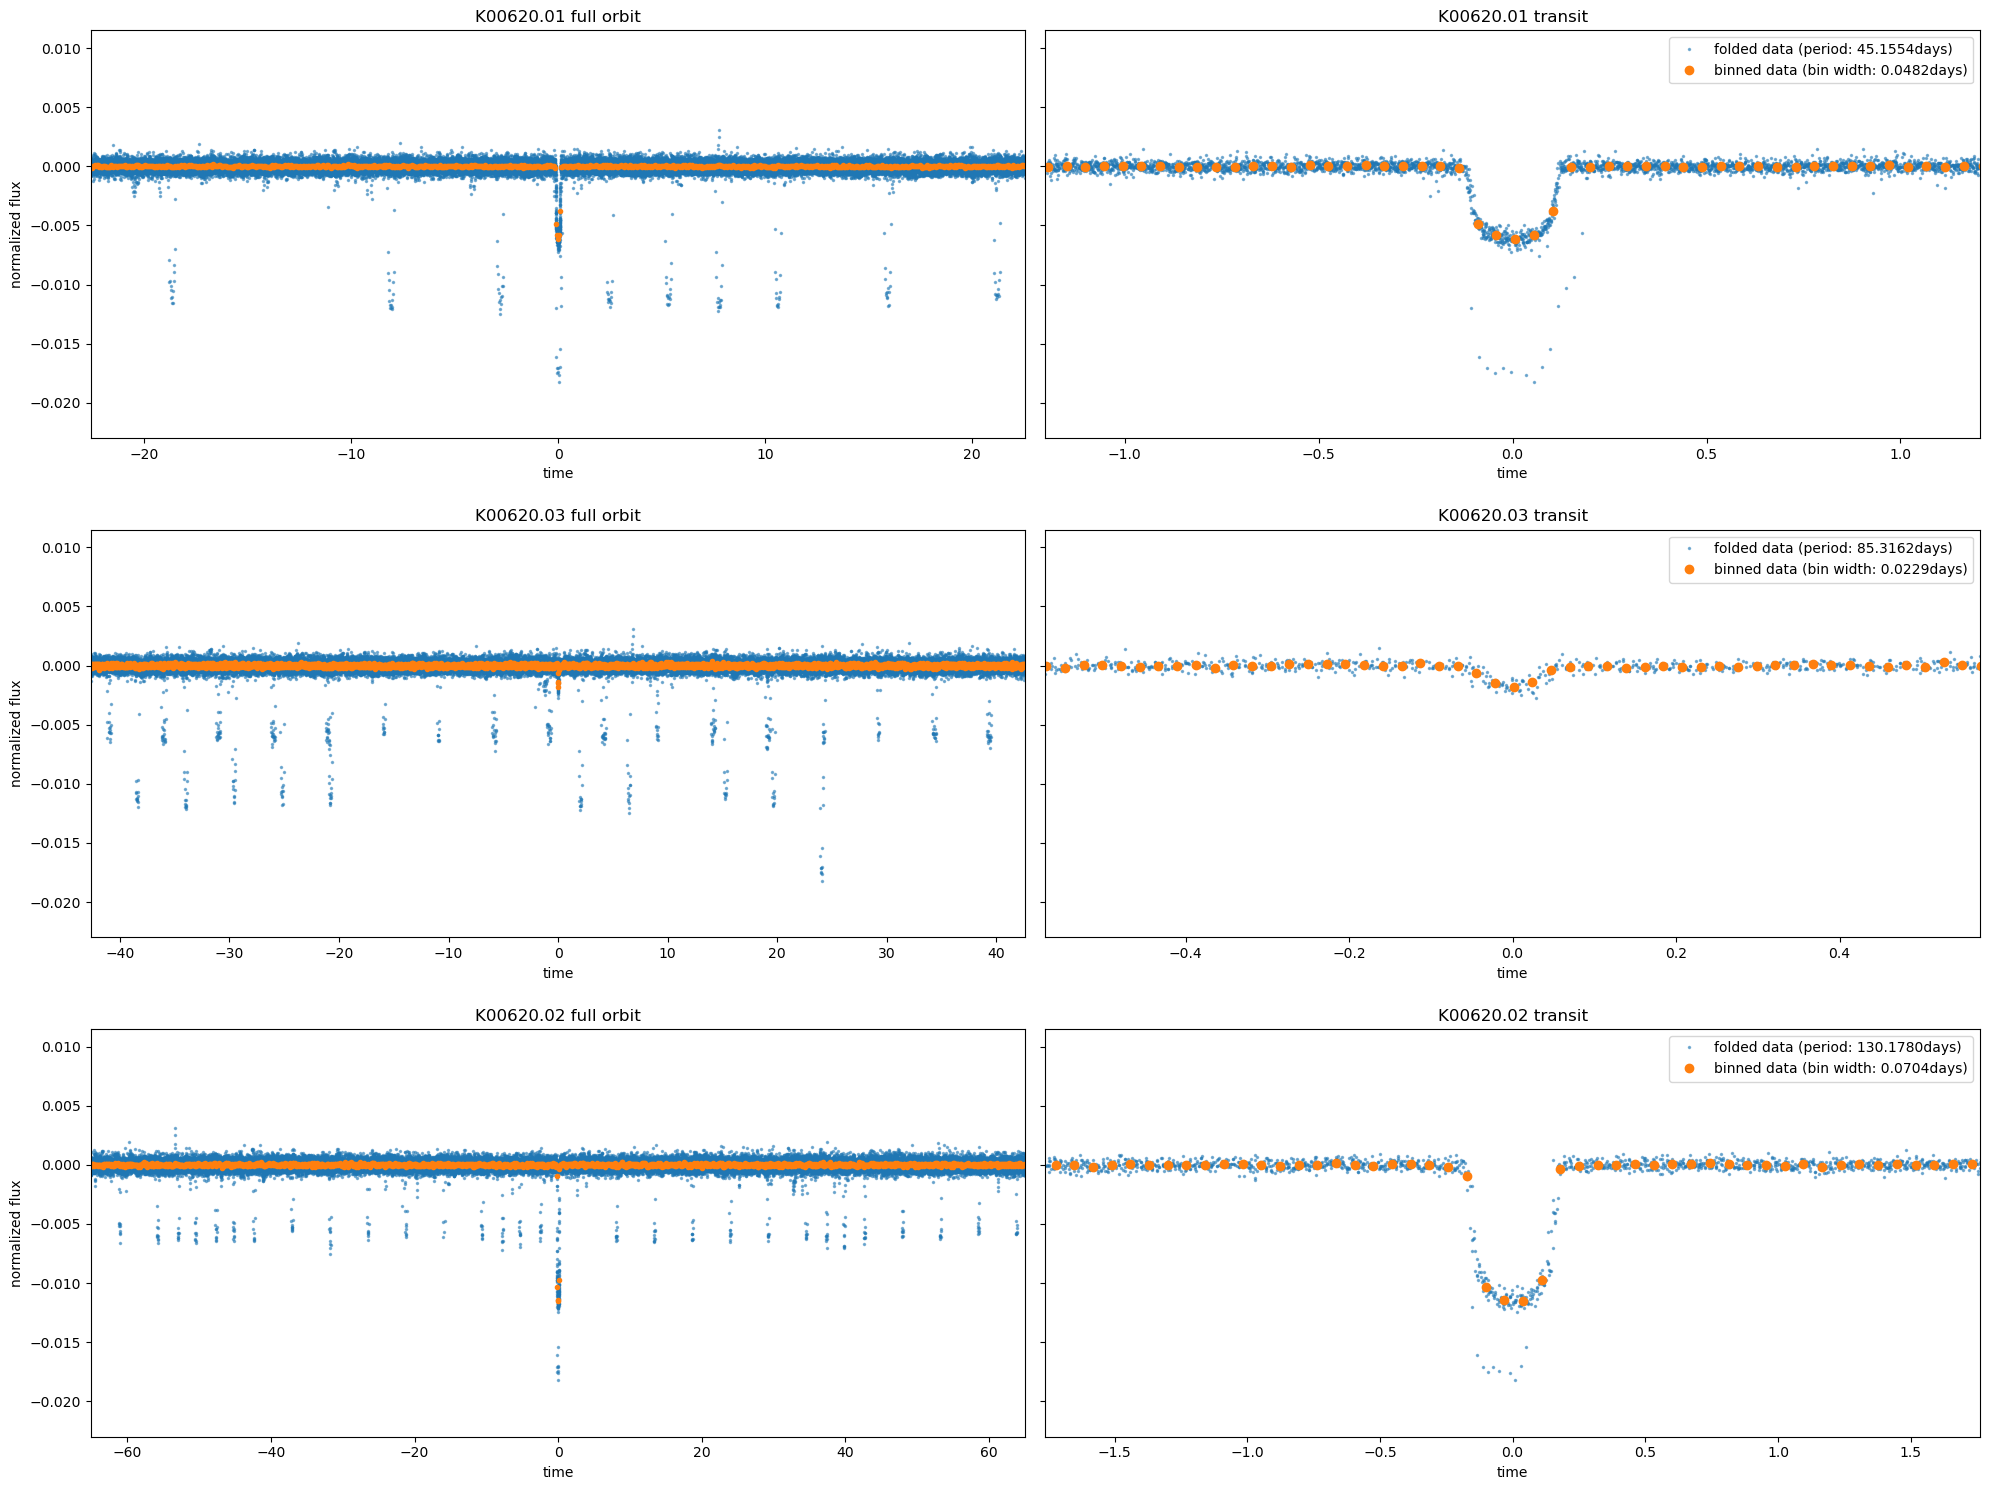

In [8]:
koiinfo = check_koi_ephemeris(kic, t, f-fbase, save_plot=True)

In [9]:
# save KOI info
koiinfo.to_csv("kic%s/kic%s_koiinfo.csv"%(kic,kic), index=False)